# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [20]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Number of classes: 100


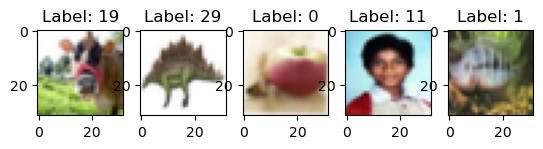

In [21]:
# Your code here
import matplotlib.pyplot as plt

# Explore the dataset
print(f'Training set shape: {x_train.shape}')
print(f'Test set shape: {x_test.shape}')
print(f'Number of classes: {len(set(y_train.flatten()))}')

# Display a few examples
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(f'Label: {y_train[i][0]}')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [22]:
# Your code here
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f'New training set shape: {x_train.shape}')
print(f'Validation set shape: {x_val.shape}')

New training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [13]:
from keras.models import Sequential
from keras.applications import ResNet50
from keras.layers import Conv2D, GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D

# Your code here
# Load the pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
base_model.trainable = False
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

# Print the model summary
model.summary()

/Users/nrojas/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172,708 (674.64 KB)

 Trainable params: 172,260 (672.89 KB)

 Non-trainable params: 448 (1.75 KB)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______Check the code
- <b>Optimizer:</b> ______Check the code

In [14]:
from keras import optimizers

# Your code here

# Loss function: categorical_crossentropy
# This is chosen because we have a multi-class classification problem.
# Optimizer: Adam
# Adam is used because it is adaptive and works well in practice for various problems.

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
```Check the code```
- Use a batch size of 32.
- Use the validation set for validation.

In [16]:
# Your code here
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.1,  # random horizontal shifts
    height_shift_range=0.1, # random vertical shifts
    horizontal_flip=True,   # random horizontal flips
)
# 50 epochs often provide a good balance between sufficient training time and reducing overfitting
# 50 epochs is usually enough to observe both the training and validation accuracy trends.
# On a machine with GPU support, 50 epochs are generally manageable in terms of training time without being too resource-intensive

# Fit the generator to the training data
datagen.fit(x_train)
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    validation_data=(x_val, y_val),
                    epochs=50)


Epoch 1/50


/Users/nrojas/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - accuracy: 0.0467 - loss: 4.4601 - val_accuracy: 0.1417 - val_loss: 3.6625
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.1144 - loss: 3.8153 - val_accuracy: 0.1753 - val_loss: 3.4597
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 27ms/step - accuracy: 0.1534 - loss: 3.5692 - val_accuracy: 0.2162 - val_loss: 3.1954
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.1857 - loss: 3.3780 - val_accuracy: 0.2390 - val_loss: 3.0684
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.2080 - loss: 3.2500 - val_accuracy: 0.2780 - val_loss: 2.8626
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.2243 - loss: 3.1353 - val_accuracy: 0.3003 - val_loss: 2.7507
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.2400 - loss: 3.0701 - val_accuracy: 0.2479 - val_loss: 3.0623
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.2538 - loss: 2.98

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______Check result
- <b>Other metric:</b> ______Check result
- <b>Reason for selection:</b> _____Check result
- <b>Value of metric:</b> ______Check result
- <b>Interpretation of metric value:</b> ______Check result

In [17]:
# Your code here
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Report other metrics
from sklearn.metrics import precision_score, recall_score
y_pred = model.predict(x_test)
y_true = y_test.argmax(axis=1)
y_pred_classes = y_pred.argmax(axis=1)

# Calculating precision and recall for example
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4587 - loss: 2.0888
Test Accuracy: 0.45680001378059387
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision: 0.4586078462235072
Recall: 0.4568


```
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "Of all instances that were predicted as a certain class, how many were actually that class?"

[ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} ]

Interpretation: A higher precision indicates a higher accuracy of the positive predictions.

Given your result, Precision: 0.4586, it means that when the model predicts an image to be a certain class, about 45.86% of the time, that prediction is correct.
```

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

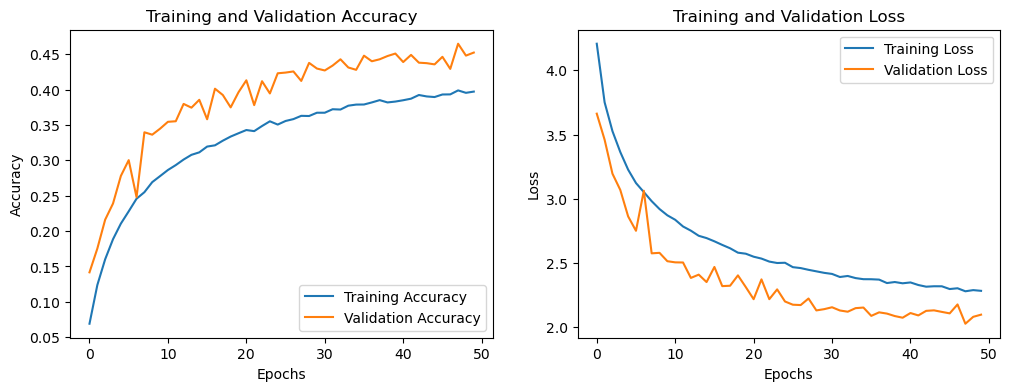

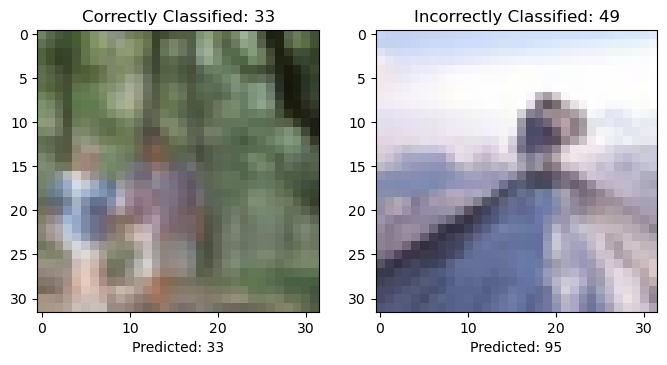

Correctly classified image probabilities: [1.0147895e-06 3.2884351e-03 1.9922836e-03 1.1051927e-02 7.1527786e-03
 1.9854666e-03 4.2506331e-03 4.3669314e-04 1.7180081e-02 1.3819544e-03
 1.0145501e-03 1.5481008e-03 6.4642867e-03 1.0705478e-03 2.3775392e-03
 6.3754572e-03 2.4719501e-03 2.8680756e-03 1.4391189e-02 1.9938653e-02
 1.5442794e-04 3.6525060e-04 2.1073413e-03 9.2192829e-05 3.6045691e-04
 2.1133469e-03 4.8547541e-04 5.0652348e-03 4.7315457e-03 7.8131389e-03
 1.6022842e-04 1.8302070e-02 1.0413200e-03 1.7710295e-01 1.8093579e-02
 3.9590122e-03 1.6113291e-03 3.2039087e-02 5.0154727e-02 1.2039679e-04
 2.7641843e-03 1.2304070e-03 4.9807403e-02 3.5817293e-03 3.8981738e-03
 6.6619273e-03 1.2340276e-03 7.5715530e-04 7.8766658e-05 2.1342794e-05
 1.1943818e-02 4.9058138e-03 1.0615474e-03 5.8711212e-08 2.8619810e-04
 1.0074974e-02 2.7448876e-02 2.2732734e-04 4.4037319e-05 7.3841475e-03
 3.3305052e-05 6.0102280e-05 5.0211611e-06 1.5419327e-02 8.2288692e-03
 8.6197071e-02 7.9404525e-03 9.9734

In [18]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

import numpy as np

# Select some indices of test samples
correct_indices = np.nonzero(y_pred_classes == y_true)[0]
incorrect_indices = np.nonzero(y_pred_classes != y_true)[0]

# Visualize a correct classification
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
correct_idx = correct_indices[0]
plt.imshow(x_test[correct_idx])
plt.title(f'Correctly Classified: {y_true[correct_idx]}')
plt.xlabel(f'Predicted: {y_pred_classes[correct_idx]}')

# Visualize an incorrect classification
plt.subplot(1, 2, 2)
incorrect_idx = incorrect_indices[0]
plt.imshow(x_test[incorrect_idx])
plt.title(f'Incorrectly Classified: {y_true[incorrect_idx]}')
plt.xlabel(f'Predicted: {y_pred_classes[incorrect_idx]}')
plt.show()

# Report classification probabilities
print(f'Correctly classified image probabilities: {y_pred[correct_idx]}')
print(f'Incorrectly classified image probabilities: {y_pred[incorrect_idx]}')


```
Overall Performance:

Both training and validation accuracies are increasing, and both losses are decreasing, indicating effective learning.
The validation loss being slightly lower than the training loss might indicate good generalization or possibly early stopping's effect or more generalized sample difficulty in validation.
Logarithmic Trends:

The logarithmic increase in accuracy and decrease in loss suggest a rapid learning phase initially, with slower improvements over time.
Good Generalization:

The mirroring behavior of training and validation accuracy/loss curves strongly suggests that the model generalizes well to new data without significant overfitting.
```

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [26]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load the pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

# Define the updated model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Replaces flatten to handle variable dimensions
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


```
Batch Normalization:

Purpose: To stabilize and accelerate the training process by normalizing the input to each layer so that they have zero mean and unit variance.
Placement: Applied after the convolutional and activation layers to ensure consistent learning and better convergence.
Adding Batch Normalization is intended to improve the model's ability to learn and converge faster by managing the internal covariance shift, providing a stable learning process. It's a powerful technique to enhance the effectiveness of deep learning models, ensuring that the network generalizes well with improved performance metrics.
```

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/50


/Users/nrojas/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 42ms/step - accuracy: 0.0350 - loss: 4.4821 - val_accuracy: 0.1115 - val_loss: 3.9923
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 39ms/step - accuracy: 0.0781 - loss: 4.1142 - val_accuracy: 0.1397 - val_loss: 3.8154
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.0936 - loss: 3.9976 - val_accuracy: 0.1559 - val_loss: 3.7145
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 43ms/step - accuracy: 0.1082 - loss: 3.9123 - val_accuracy: 0.1618 - val_loss: 3.6545
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 45ms/step - accuracy: 0.1177 - loss: 3.8578 - val_accuracy: 0.1725 - val_loss: 3.5975
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 46ms/step - accuracy: 0.1236 - loss: 3.8305 - val_accuracy: 0.1753 - val_loss: 3.5748
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.1267 - loss: 3.8132 - val_accuracy: 0.1772 - val_loss: 3.5497
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.1285 - loss: 3.79

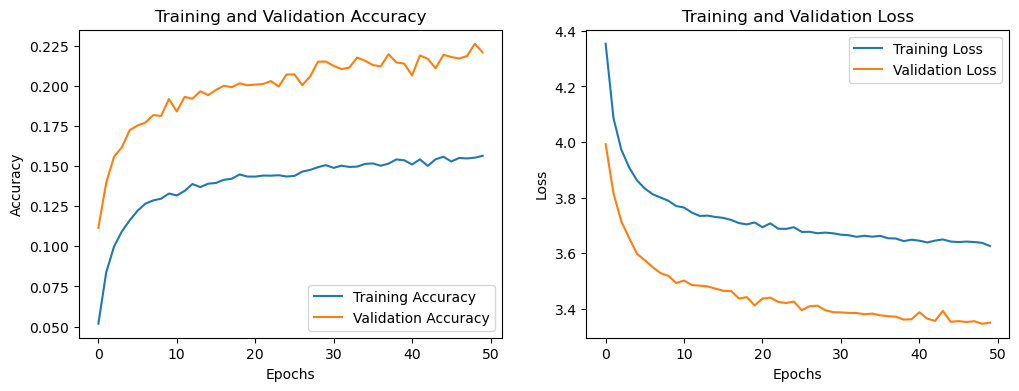

In [27]:
# Your code here
# Assume previous imports and dataset loading steps are here

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score
import numpy as np
import matplotlib.pyplot as plt

# Data Augmentation if needed
datagen = ImageDataGenerator(
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    horizontal_flip=True
)
datagen.fit(x_train)

# Train the model using the data generator
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    validation_data=(x_val, y_val),
                    epochs=50)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Predict classes and report precision
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

precision = precision_score(y_true, y_pred_classes, average='macro')
print(f'Precision: {precision}')

# Plot the training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.